Metrics:
- Sensitivity (Recall) - What % of real events got detected? $\frac{TP}{TP+FN}$
- Specificity - What % of no events got detected? $\frac{TN}{TN+FP}$
- Precision - What % of predicted events where real events? $\frac{TP}{TP+FP}$

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('36_prec_rec_new_no_hypno.csv')
runs = ['new_baseline_failsafe', 'new_baseline_BN', 'no_spo2', 'pleth_pre_stat_vae', 'pleth_pre_vae', 'pleth_pre_stat', 'no_hypnogram']

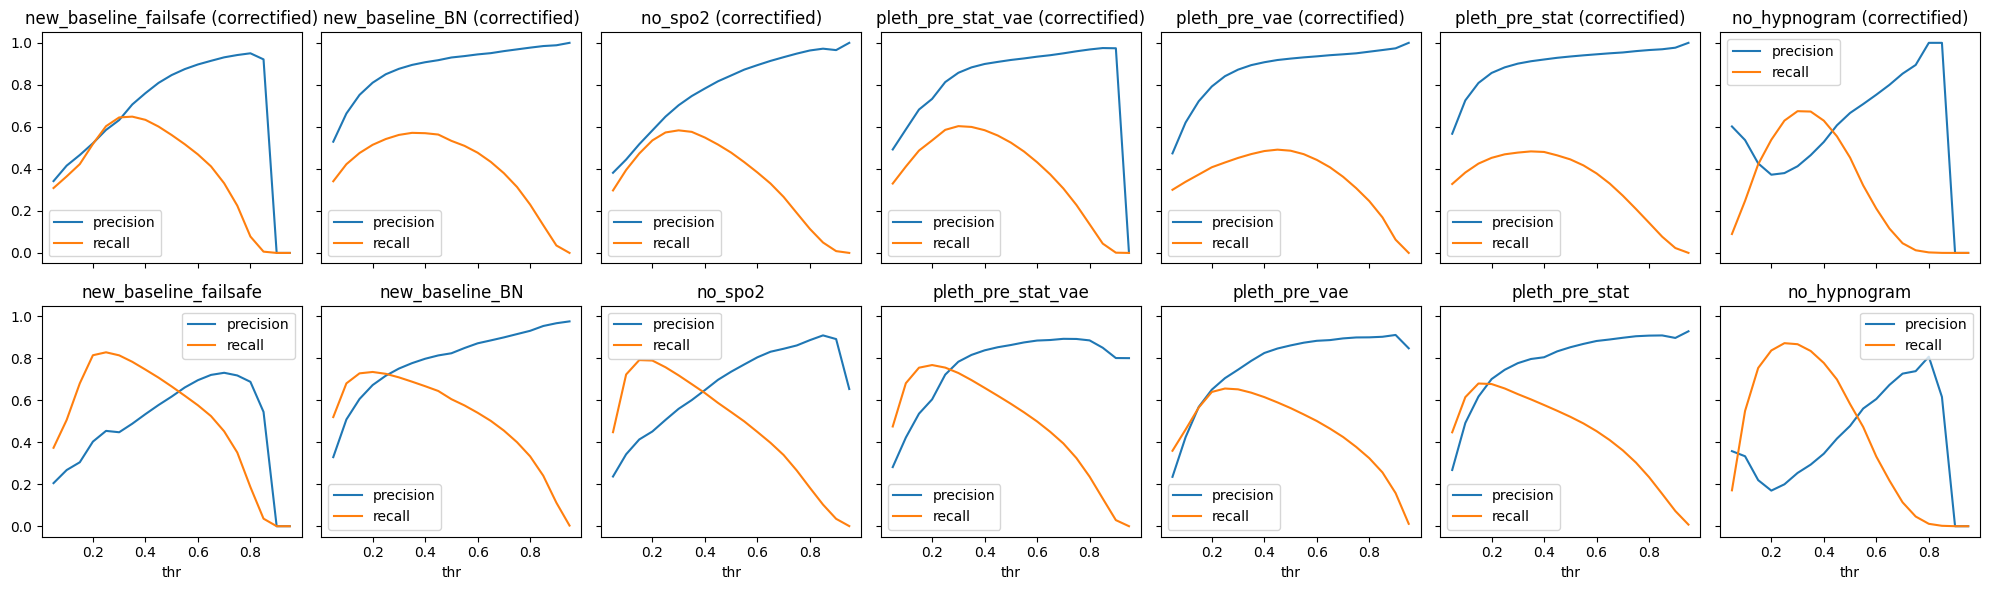

In [3]:
_, axs = plt.subplots(2, len(runs), figsize=(20, 6), sharex=True, sharey=True)
for col, run in enumerate(runs):
    for row, correctify in enumerate([True, False]):
        data[(data['run'] == run) & (data['correctify'] == correctify)][['thr', 'precision', 'recall']].set_index('thr').iloc[1:20].plot(ax=axs[row, col], title=f'{run}{' (correctified)' if correctify else ''}')
plt.tight_layout()

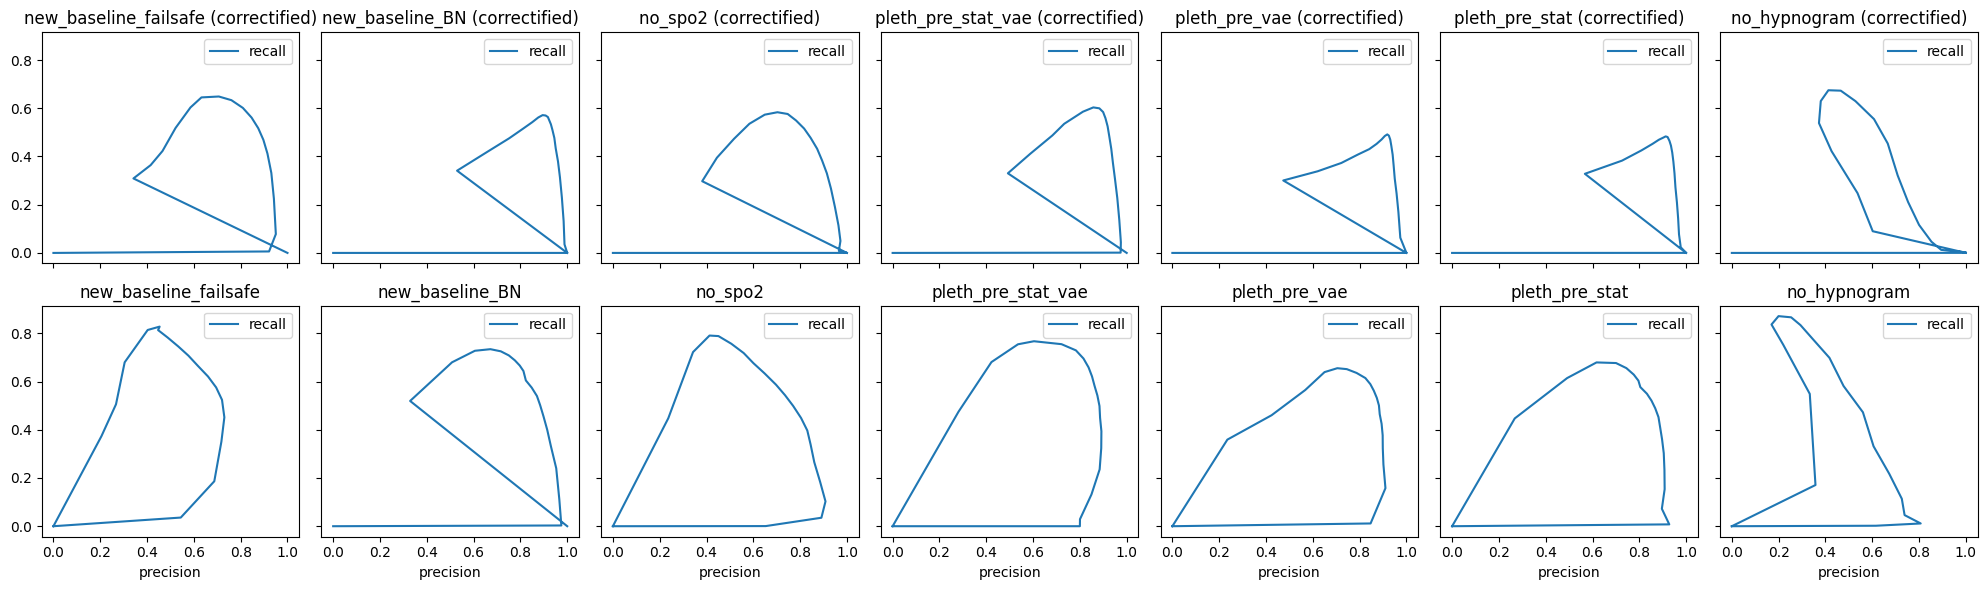

In [4]:
_, axs = plt.subplots(2, len(runs), figsize=(20, 6), sharex=True, sharey=True)
for col, run in enumerate(runs):
    for row, correctify in enumerate([True, False]):
        data[(data['run'] == run) & (data['correctify'] == correctify)][['precision', 'recall']].set_index('precision').plot(ax=axs[row, col], title=f'{run}{' (correctified)' if correctify else ''}')
plt.tight_layout()

In [5]:
data['f1'] = (2 * data['precision'] * data['recall']) / (data['precision'] + data['recall'])

In [6]:
data

,run,correctify,thr,precision,recall,f1
0,new_baseline_failsafe,True,0.00,1.000000,0.000010,0.000020
1,new_baseline_failsafe,True,0.05,0.341888,0.308863,0.324537
2,new_baseline_failsafe,True,0.10,0.415459,0.364228,0.388160
3,new_baseline_failsafe,True,0.15,0.466039,0.422703,0.443315
4,new_baseline_failsafe,True,0.20,0.521941,0.518445,0.520187
...,...,...,...,...,...,...
289,no_hypnogram,False,0.80,0.807018,0.011406,0.022494
290,no_hypnogram,False,0.85,0.615385,0.001984,0.003955
291,no_hypnogram,False,0.90,0.000000,0.000000,NaN
292,no_hypnogram,False,0.95,0.000000,0.000000,NaN


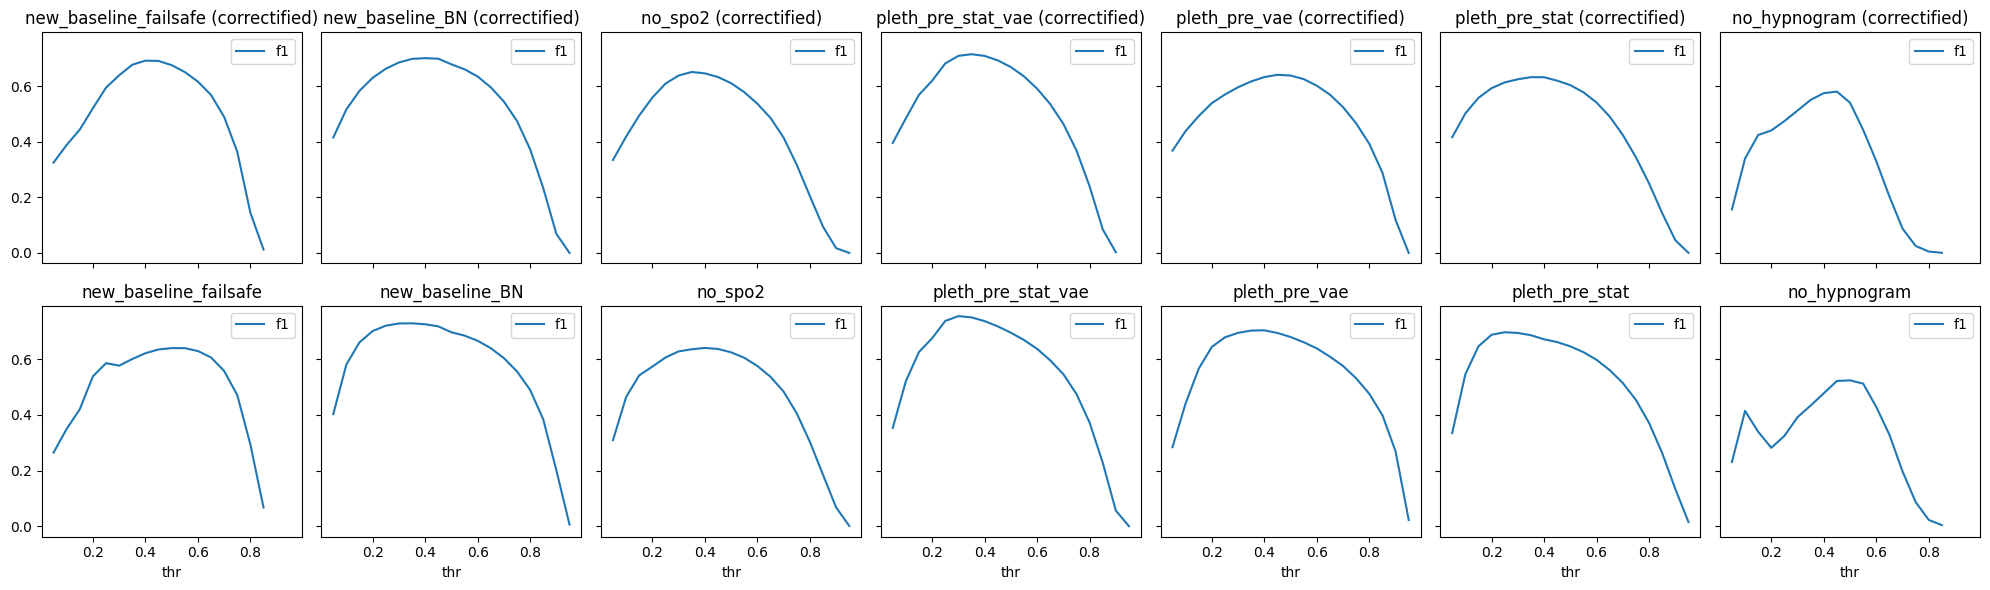

In [7]:
_, axs = plt.subplots(2, len(runs), figsize=(20, 6), sharex=True, sharey=True)
for col, run in enumerate(runs):
    for row, correctify in enumerate([True, False]):
        data[(data['run'] == run) & (data['correctify'] == correctify)][['thr', 'f1']].set_index('thr').iloc[1:20].plot(ax=axs[row, col], title=f'{run}{' (correctified)' if correctify else ''}')
plt.tight_layout()

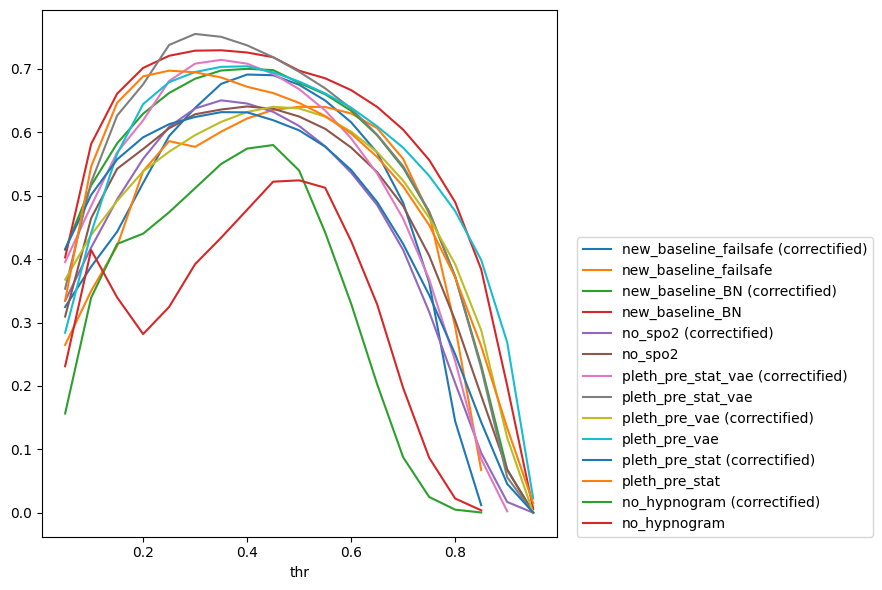

In [16]:
_, axs = plt.subplots(1, 1, figsize=(9, 6), sharex=True, sharey=True)
for col, run in enumerate(runs):
    for row, correctify in enumerate([True, False]):
        f1_by_thr = data[(data['run'] == run) & (data['correctify'] == correctify)][['thr', 'f1']].set_index('thr')
        f1_by_thr.columns = [f'{run}{' (correctified)' if correctify else ''}']
        f1_by_thr.iloc[1:20].plot(ax=axs)
plt.legend(loc=(1.04, 0))
plt.tight_layout()

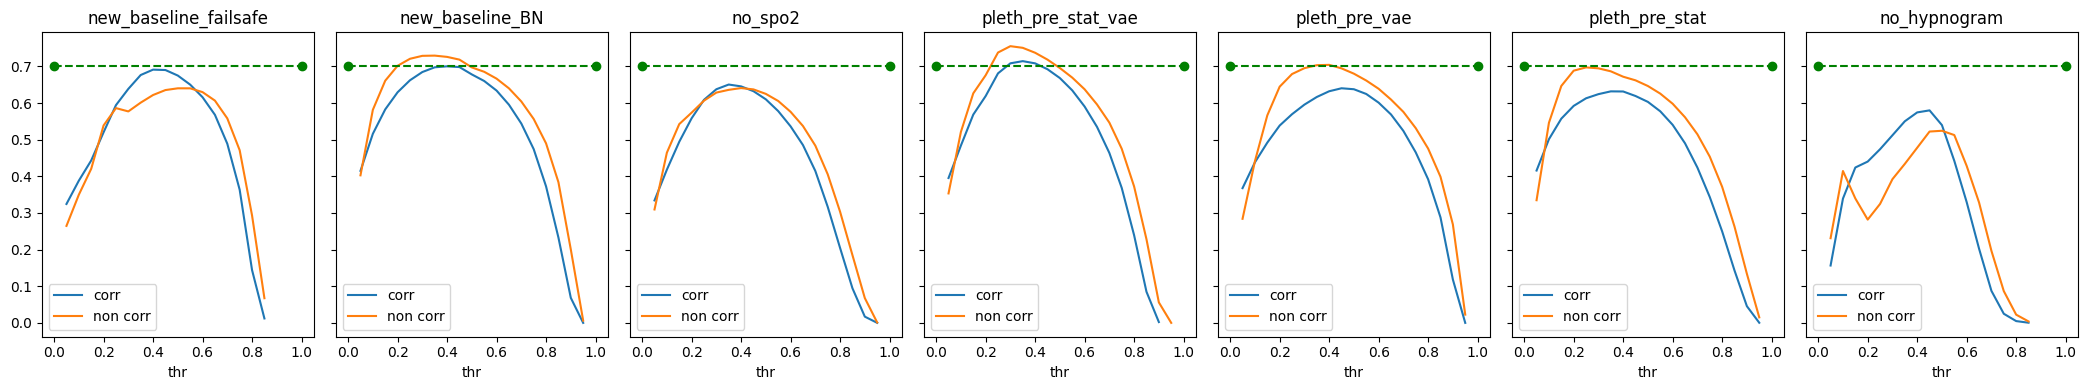

In [24]:
_, axs = plt.subplots(1, len(runs), figsize=(len(runs)*3, 4), sharex=True, sharey=True)
for i, run in enumerate(runs):
    for correctify in [True, False]:
        f1_by_thr = data[(data['run'] == run) & (data['correctify'] == correctify)][['thr', 'f1']].set_index('thr')
        f1_by_thr.columns = [f'{'corr' if correctify else 'non corr'}']
        f1_by_thr.iloc[1:20].plot(ax=axs[i], title=run)
    axs[i].plot([0,1], [0.7]*2, color='green', linestyle='dashed', marker='o')
plt.tight_layout()